In [1]:
import pandas as pd 
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## Data Quality Assessment and Data Cleaning



In [2]:
# Đọc các sheet
path =  'D:\project\RFM\Raw_data.xlsx'
transaction_df = pd.read_excel(path, sheet_name='Transactions')
newcustomerlist_df = pd.read_excel(path, sheet_name='NewCustomerList')
customerdemographic_df = pd.read_excel(path, sheet_name='CustomerDemographic')
customeraddress_df = pd.read_excel(path, sheet_name='CustomerAddress')



### Customer demographic



In [3]:
customerdemographic_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [4]:
# Check for duplicate rows
duplicate_count = transaction_df.duplicated().sum()
print(f'Total number of duplicate rows: {duplicate_count}')

# Check for missing values
customerdemographic_df.isnull().sum()


Total number of duplicate rows: 0


customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [5]:

# Drop 1 irrelevant columns
customerdemographic_df.drop(columns=['default'], inplace=True)

# Drop rows with missing values in the important columns
customerdemographic_df.dropna(subset=['gender', 'DOB', 'job_title', 'wealth_segment', 'owns_car'], inplace=True)
# Standardize the gender column
customerdemographic_df['gender'] = customerdemographic_df['gender'].str.strip().str.capitalize()
customerdemographic_df['gender'].replace({'Male': 'M', 'Female': 'F'}, inplace=True)






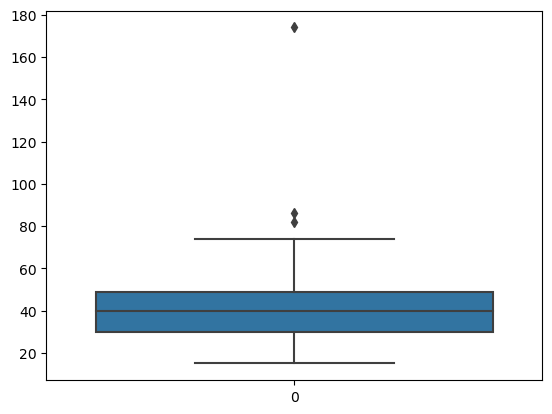

In [6]:
# Calculate the age based on the current year
today_year = transaction_df['transaction_date'].max().year

customerdemographic_df['DOB'] = pd.to_datetime(customerdemographic_df['DOB'])
customerdemographic_df['age'] = today_year - customerdemographic_df['DOB'].dt.year

# check for outliers value
sns.boxplot(customerdemographic_df['age'])

# Drop the rows with age greater than 80
customerdemographic_df = customerdemographic_df[customerdemographic_df['age'] < 80]

<Axes: xlabel='age_group', ylabel='count'>

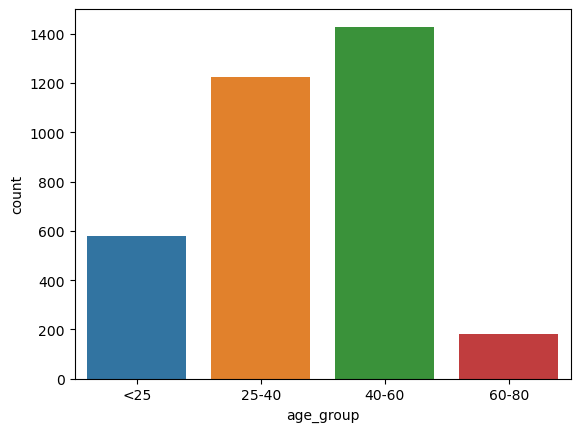

In [7]:
# create age group
customerdemographic_df['age_group'] = pd.cut(customerdemographic_df['age'], bins=[0, 25, 40, 60, 80], labels=['<25', '25-40', '40-60', '60-80'])
customerdemographic_df['age_group'] = customerdemographic_df['age_group'].astype('category')
# visualize the age group
sns.countplot(x='age_group', data=customerdemographic_df)


### newcustomerlist

In [8]:
newcustomerlist_df.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747270,0.839145,0.944456,0.872373,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.210585,0.254564,0.306850,0.293649,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.560000,0.620000,0.700000,0.648125,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.825000,0.920000,0.839375,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.040000,1.156250,1.075000,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [9]:
#check fot duplicate rows
duplicate_count = newcustomerlist_df.duplicated().sum()
print(f'Total number of duplicate rows: {duplicate_count}')
#check for missing values
newcustomerlist_df.isnull().sum()

Total number of duplicate rows: 0


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [10]:
newcustomerlist_df
#5 Irrelevent column was present and such columns were dropped from the dataset.
#convert DOB to datetime
newcustomerlist_df['DOB'] = pd.to_datetime(newcustomerlist_df['DOB'])
# 5 Irrelevent column was removed 
newcustomerlist_df.drop(columns={'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'}, inplace=True)

#Check for missing values
newcustomerlist_df.isnull().sum()


# Dealing with missing values in  4 columns
newcustomerlist_df.dropna(subset=['last_name'], inplace=True)
newcustomerlist_df['DOB'].fillna(newcustomerlist_df['DOB'].median(), inplace=True)
newcustomerlist_df['job_title'].fillna(newcustomerlist_df['job_title'].mode()[0], inplace=True)
newcustomerlist_df['job_industry_category'].fillna(newcustomerlist_df['job_industry_category'].mode()[0], inplace=True)



<Axes: xlabel='age_group', ylabel='count'>

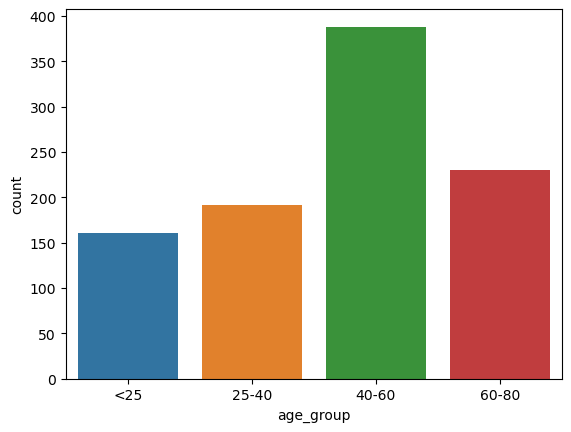

In [11]:

# divide age to 4 age groups
today_year = transaction_df['transaction_date'].max().year
# Create age column
newcustomerlist_df['age'] = today_year - newcustomerlist_df['DOB'].dt.year
# Create age group column
newcustomerlist_df['age_group'] = pd.cut(newcustomerlist_df['age'], bins=[0, 25, 40, 60, 80], labels=['<25', '25-40', '40-60', '60-80'])
newcustomerlist_df['age_group'] = newcustomerlist_df['age_group'].astype('category')
# visualize the age group
sns.countplot(x='age_group', data=newcustomerlist_df)


### CustomerAddress 

In [12]:
customeraddress_df.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [13]:
# Check for duplicate rows
duplicate_count = customeraddress_df.duplicated().sum()
print(f'Total number of duplicate rows: {duplicate_count}')
#check for missing values
customeraddress_df.isnull().sum()  

Total number of duplicate rows: 0


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [14]:


# For states column there was no standardisation of data. Based on the values available the column data was standardised to remove data inconsistency.
customeraddress_df['state'] = customeraddress_df['state'].str.strip()
customeraddress_df['state'] = customeraddress_df['state'].str.lower()
customeraddress_df['state'].replace({ 'new south wales':'nsw',  'victoria':'vic',  'queensland':'qld'}, inplace=True)
# There were certain customer IDs from Customer Dempgraphics table which were getting dropped in the Address table. Such records were dropped from the Customer Address table.
customeraddress_df = customeraddress_df[customeraddress_df['customer_id'].isin(customerdemographic_df['customer_id'])]
customeraddress_df

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,nsw,Australia,10
1,2,6 Meadow Vale Court,2153,nsw,Australia,10
3,5,17979 Del Mar Point,2448,nsw,Australia,4
6,8,49 Londonderry Lane,2650,nsw,Australia,4
7,9,97736 7th Trail,2023,nsw,Australia,12
...,...,...,...,...,...,...
3989,3994,2918 Summer Ridge Hill,3030,vic,Australia,2
3990,3995,613 Erie Lane,2088,nsw,Australia,12
3991,3996,0 Transport Center,3977,vic,Australia,6
3992,3997,4 Dovetail Crossing,2350,nsw,Australia,2


### Transaction_data


In [15]:
transaction_df.describe()


,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [16]:
# Check for duplicate rows
duplicate_count = transaction_df.duplicated().sum()
print(f'Total number of duplicate rows: {duplicate_count}')

# Check for missing values
transaction_df.isnull().sum()


Total number of duplicate rows: 0


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [17]:
# There were 7 columns were Missing values were present. For such columns based on the volumne of the missing values either the records were dropped or appropiate values were imputed at places of missing values
transaction_df = transaction_df.dropna(subset=['brand', 'online_order', 'product_class', 'product_size', 'product_line', 'product_first_sold_date'])

transaction_df['list_price'] = transaction_df.groupby(['brand', 'product_line', 'product_class', 'product_size'])['list_price'].transform(lambda x: x.fillna(x.mean()))
transaction_df['standard_cost'] = transaction_df.groupby(['brand', 'product_line', 'product_class', 'product_size'])['standard_cost'].transform(lambda x: x.fillna(x.mean()))
# Checking the missing values again after processing

transaction_df.isnull().sum()



transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [18]:

# A new feature column 'Profit' was created which is basically the difference between list price and standard price.
transaction_df['Profit'] = transaction_df['list_price'] - transaction_df['standard_cost']

## RFM - ANALYSIS

In [19]:
RFM = pd.DataFrame()
# Caculate Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
RFM['recency'] = transaction_df['transaction_date'].max() - transaction_df.groupby('customer_id')['transaction_date'].max()
RFM['recency'] = RFM['recency'].dt.days
# Calculate Frequency (F): Who has purchased frequently? It means the total number of purchases.
RFM['frequency'] = transaction_df.groupby('customer_id')['transaction_id'].count()
# Calculate Monetary Value (M): Who have high purchase amount? It means the total money customer spent.
RFM['monetary'] = transaction_df.groupby('customer_id')['Profit'].sum()

In [ ]:
#Assign scores based on quartiles for Recency, Frequency, and Monetary
RFM['recency_score'] = pd.qcut(RFM['recency'], q=4, labels=range(4, 0, -1))
RFM['frequency_score'] = pd.qcut(RFM['frequency'], q=4, labels=range(1, 5))
RFM['monetary_score'] = pd.qcut(RFM['monetary'], q=4, labels=range(1, 5))

# Convert scores to integers 
RFM['recency_score'] = RFM['recency_score'].astype(int)
RFM['frequency_score'] = RFM['frequency_score'].astype(int)
RFM['monetary_score'] = RFM['monetary_score'].astype(int)

# Step 2: Calculate the final RFM score by applying the weighted average method
# Weighted average: recency = 100, frequency = 10, and monetary = 1
RFM['final_score'] = (RFM['recency_score'] * 100 + 
                      RFM['frequency_score'] * 10 + 
                      RFM['monetary_score'] * 1)

# Sort the final RFM table by final score to see which customers are the best
RFM = RFM.sort_values(by='final_score', ascending=False)

# View the final table with RFM scores
RFM



,recency,frequency,monetary,recency_score,frequency_score,monetary_score,final_score
customer_id,,,,,,,
3217,8,11,5564.08,4,4,4,444
1317,10,9,7024.71,4,4,4,444
2492,7,10,8437.43,4,4,4,444
2476,14,14,7493.23,4,4,4,444
3191,7,8,5673.64,4,4,4,444
...,...,...,...,...,...,...,...
434,297,2,1027.89,1,1,1,111
910,272,2,1346.38,1,1,1,111
1362,118,2,1736.45,1,1,1,111


In [21]:
def segment_customer(rfm_score):
    if rfm_score >= 444:
        return 'Platinum Customers'
    elif 433 <= rfm_score < 444:
        return 'Very Loyal Customers'
    elif 421 <= rfm_score < 433:
        return 'Becoming Loyal'
    elif 344 <= rfm_score < 421:
        return 'Recent Customers'
    elif 323 <= rfm_score < 344:
        return 'Potential Customers'
    elif 311 <= rfm_score < 323:
        return 'Late Bloomer'
    elif 224 <= rfm_score < 311:
        return 'Losing Customers'
    elif 212 <= rfm_score < 244:
        return 'High Risk Customers'
    elif 124 <= rfm_score < 212:
        return 'Almost Lost Customers'
    elif 112 <= rfm_score < 124:
        return 'Evasive Customers'
    else:
        return 'Lost Customers'

RFM['customer_segment'] = RFM['final_score'].apply(segment_customer)

RFM

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,final_score,customer_segment
customer_id,,,,,,,,
3217,8,11,5564.08,4,4,4,444,Platinum Customers
1317,10,9,7024.71,4,4,4,444,Platinum Customers
2492,7,10,8437.43,4,4,4,444,Platinum Customers
2476,14,14,7493.23,4,4,4,444,Platinum Customers
3191,7,8,5673.64,4,4,4,444,Platinum Customers
...,...,...,...,...,...,...,...,...
434,297,2,1027.89,1,1,1,111,Lost Customers
910,272,2,1346.38,1,1,1,111,Lost Customers
1362,118,2,1736.45,1,1,1,111,Lost Customers


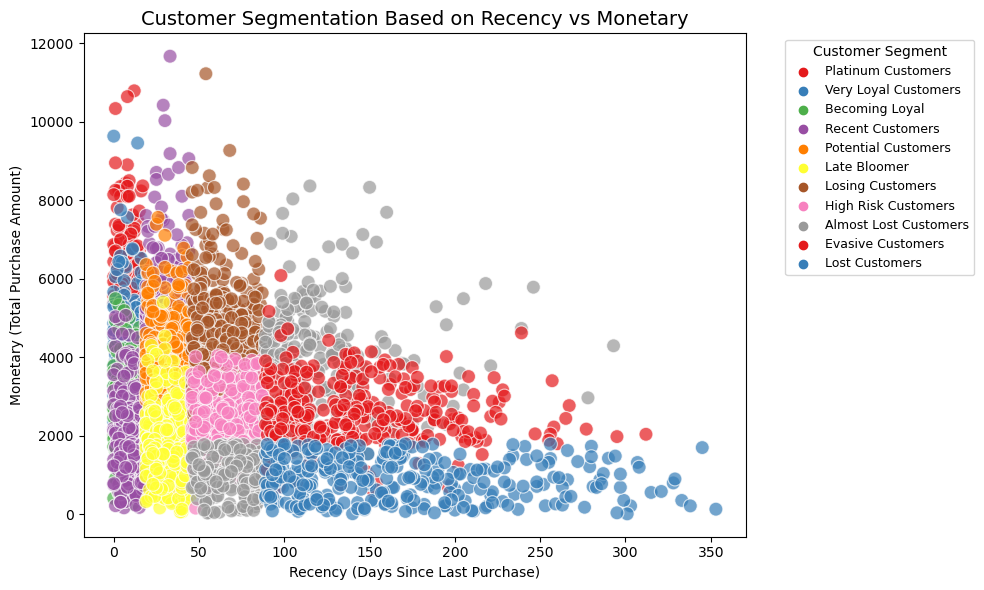

In [22]:


# Scatter plot for Recency vs Monetary with Hue based on customer_segment
plt.figure(figsize=(10, 6))

# Using 'Set2' palette for better visibility of different customer segments
sns.scatterplot(data=RFM, x='recency', y='monetary', hue='customer_segment', palette='Set1', s=100, alpha=0.7)

# Add title and labels with smaller font size
plt.title('Customer Segmentation Based on Recency vs Monetary', fontsize=14)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=10)
plt.ylabel('Monetary (Total Purchase Amount)', fontsize=10)

# Display legend with smaller font size
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


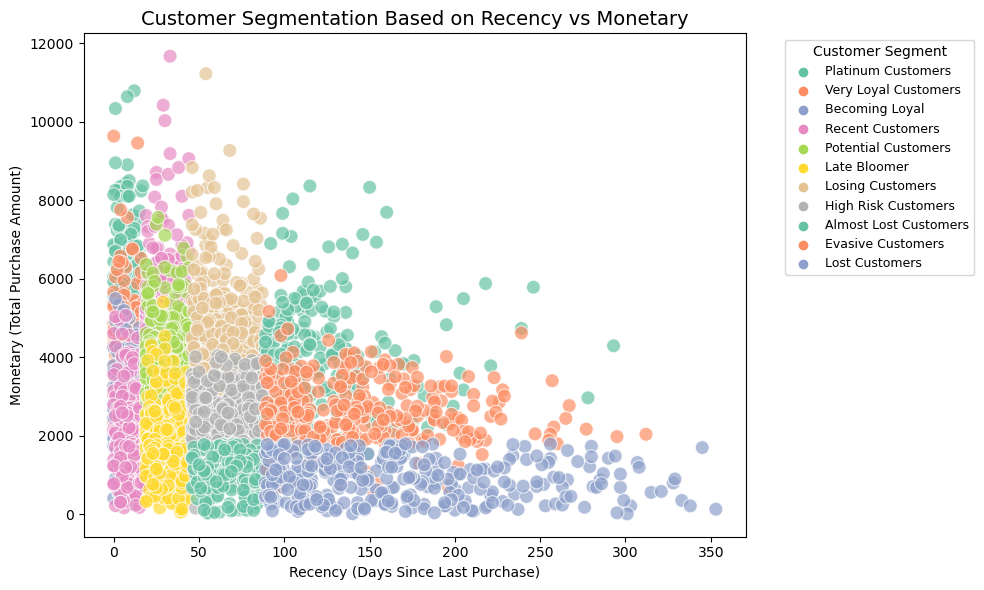

In [23]:


# Scatter plot for Recency vs Monetary with Hue based on customer_segment
plt.figure(figsize=(10, 6))

# Using 'Set2' palette for better visibility of different customer segments
sns.scatterplot(data=RFM, x='recency', y='monetary', hue='customer_segment', palette='Set2', s=100, alpha=0.7)

# Add title and labels with smaller font size
plt.title('Customer Segmentation Based on Recency vs Monetary', fontsize=14)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=10)
plt.ylabel('Monetary (Total Purchase Amount)', fontsize=10)

# Display legend with smaller font size
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


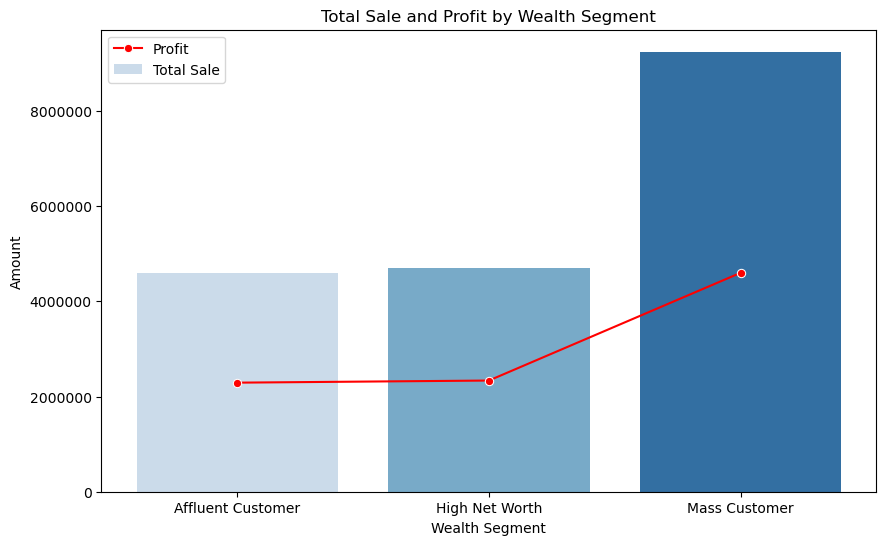

In [24]:
sale_profit_by_wealth_segment = pd.merge(transaction_df, customerdemographic_df[['customer_id', 'wealth_segment']], on='customer_id', how='left')
from matplotlib.ticker import FuncFormatter

# Tính toán tổng sale và lợi nhuận theo 'wealth_segment'
summary_df = sale_profit_by_wealth_segment.groupby('wealth_segment').agg(
    total_sale=('list_price', 'sum'),
    profit=('Profit', 'sum')         
).reset_index()


plt.figure(figsize=(10, 6))

# Vẽ barplot cho total_sale
sns.barplot(x='wealth_segment', y='total_sale', data=summary_df, palette='Blues', label='Total Sale')

# Vẽ lineplot cho profit
sns.lineplot(x='wealth_segment', y='profit', data=summary_df, color='red', marker='o', label='Profit')

# Thêm tiêu đề và nhãn
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sale and Profit by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Amount')

plt.legend()

# Hiển thị biểu đồ
plt.show()

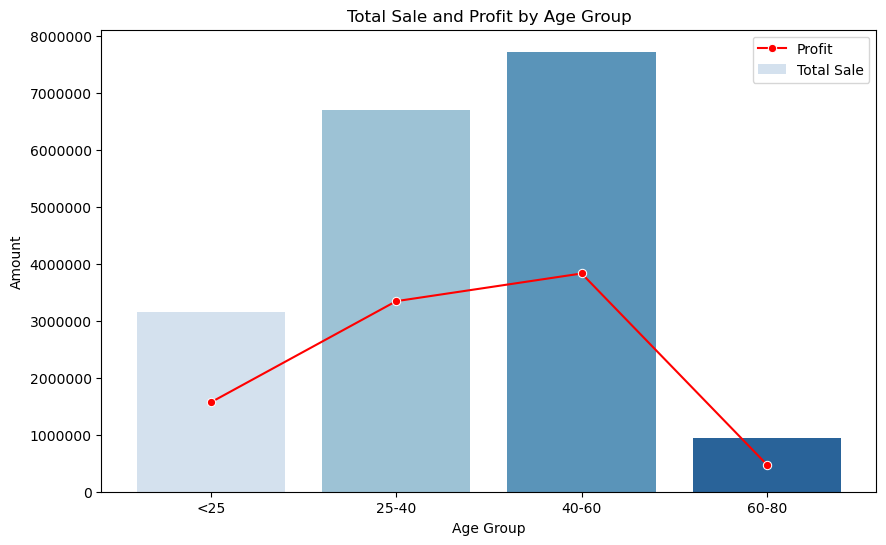

In [25]:

sale_profit_by_age_group = pd.merge(transaction_df, customerdemographic_df[['customer_id', 'age_group']], on='customer_id', how='left')
# Tính toán tổng sale và lợi nhuận theo 'wealth_segment'

summary_df2 = sale_profit_by_age_group.groupby('age_group').agg(
    total_sale=('list_price', 'sum'),
    profit=('Profit', 'sum')         
).reset_index()


plt.figure(figsize=(10, 6))

# Vẽ barplot cho total_sale
sns.barplot(x='age_group', y='total_sale', data=summary_df2, palette='Blues', label='Total Sale')

# Vẽ lineplot cho profit
sns.lineplot(x='age_group', y='profit', data=summary_df2, color='red', marker='o', label='Profit')

# Thêm tiêu đề và nhãn
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sale and Profit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Amount')

plt.legend()

# Hiển thị biểu đồ
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31860\2537265320.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand', y='list_price', data=total_sale_profit_by_brand, palette='Blues', ci=None)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31860\2537265320.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='brand', y='Profit', data=total_sale_profit_by_brand,color='red', ci=None)


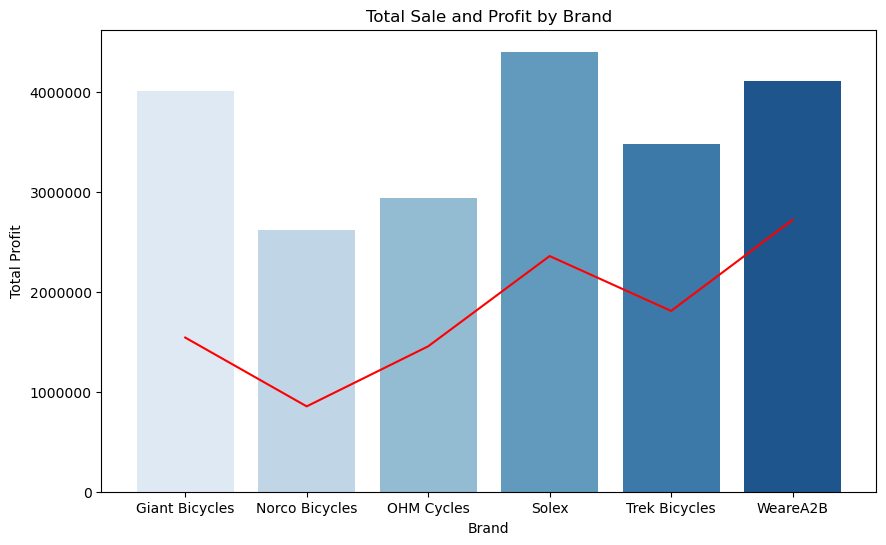

In [26]:
# sale by brand
total_sale_profit_by_brand = transaction_df.groupby('brand').agg({'list_price': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='list_price', data=total_sale_profit_by_brand, palette='Blues', ci=None)
sns.lineplot(x='brand', y='Profit', data=total_sale_profit_by_brand,color='red', ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sale and Profit by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Profit')
plt.show()

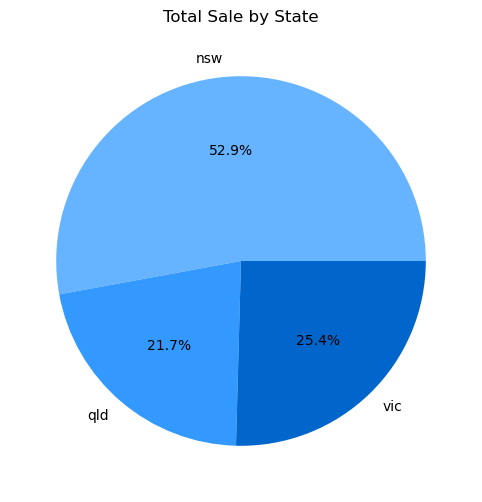

In [27]:
sael_by_state= pd.merge(transaction_df, customeraddress_df[['customer_id', 'state']], on='customer_id', how='left')

Sale_by_state = sael_by_state.groupby('state').agg({'list_price': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.pie(Sale_by_state['list_price'], labels=Sale_by_state['state'], autopct='%1.1f%%', colors = ['#66b3ff', '#3399ff', '#0066cc', '#003366', '#66ccff'])
plt.title('Total Sale by State')
plt.show()


Text(0.5, 0, 'Customer Segment')

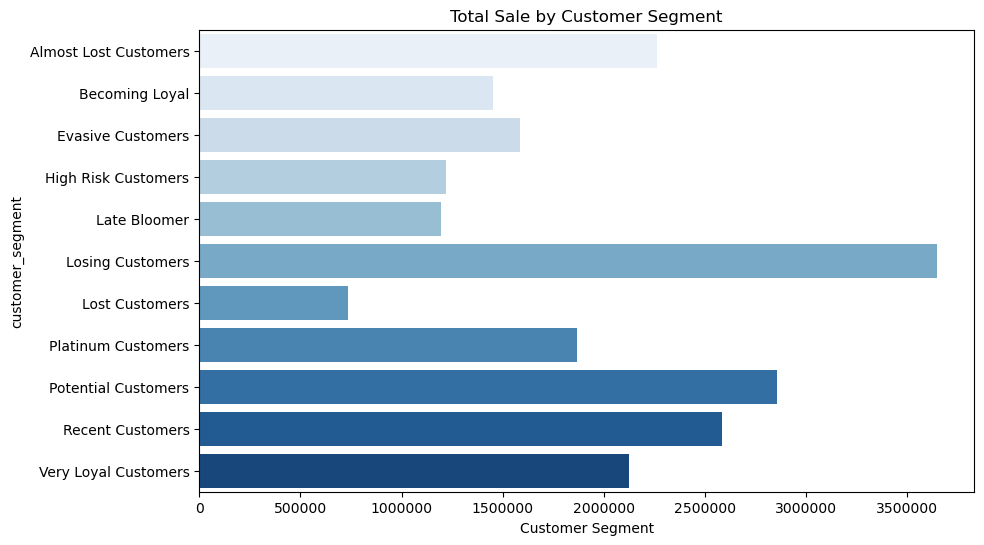

In [28]:
RFM
RFM_reset = RFM.reset_index()
RFM_transaction = pd.merge( transaction_df[['customer_id', 'list_price', 'Profit']], RFM_reset[['customer_id','customer_segment']], on='customer_id', how='left')


RFM_transaction_summary = RFM_transaction.groupby('customer_segment').agg(
    total_sale = ('list_price', 'sum'),
    total_profit = ('Profit', 'sum')).reset_index()



# barplot theo chiều ngang
plt.figure(figsize=(10, 6))
sns.barplot(y='customer_segment', x='total_sale', data=RFM_transaction_summary, palette='Blues', orient='h')

plt.title('Total Sale by Customer Segment')
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Customer Segment')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31860\1895814116.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand', y='list_price', data=total_sale_profit_by_brand, palette='Blues', ci=None, ax=axes[0, 2], label='Total Sale')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31860\1895814116.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='brand', y='Profit', data=total_sale_profit_by_brand, color='red', ci=None, ax=axes[0, 2], label='Profit')


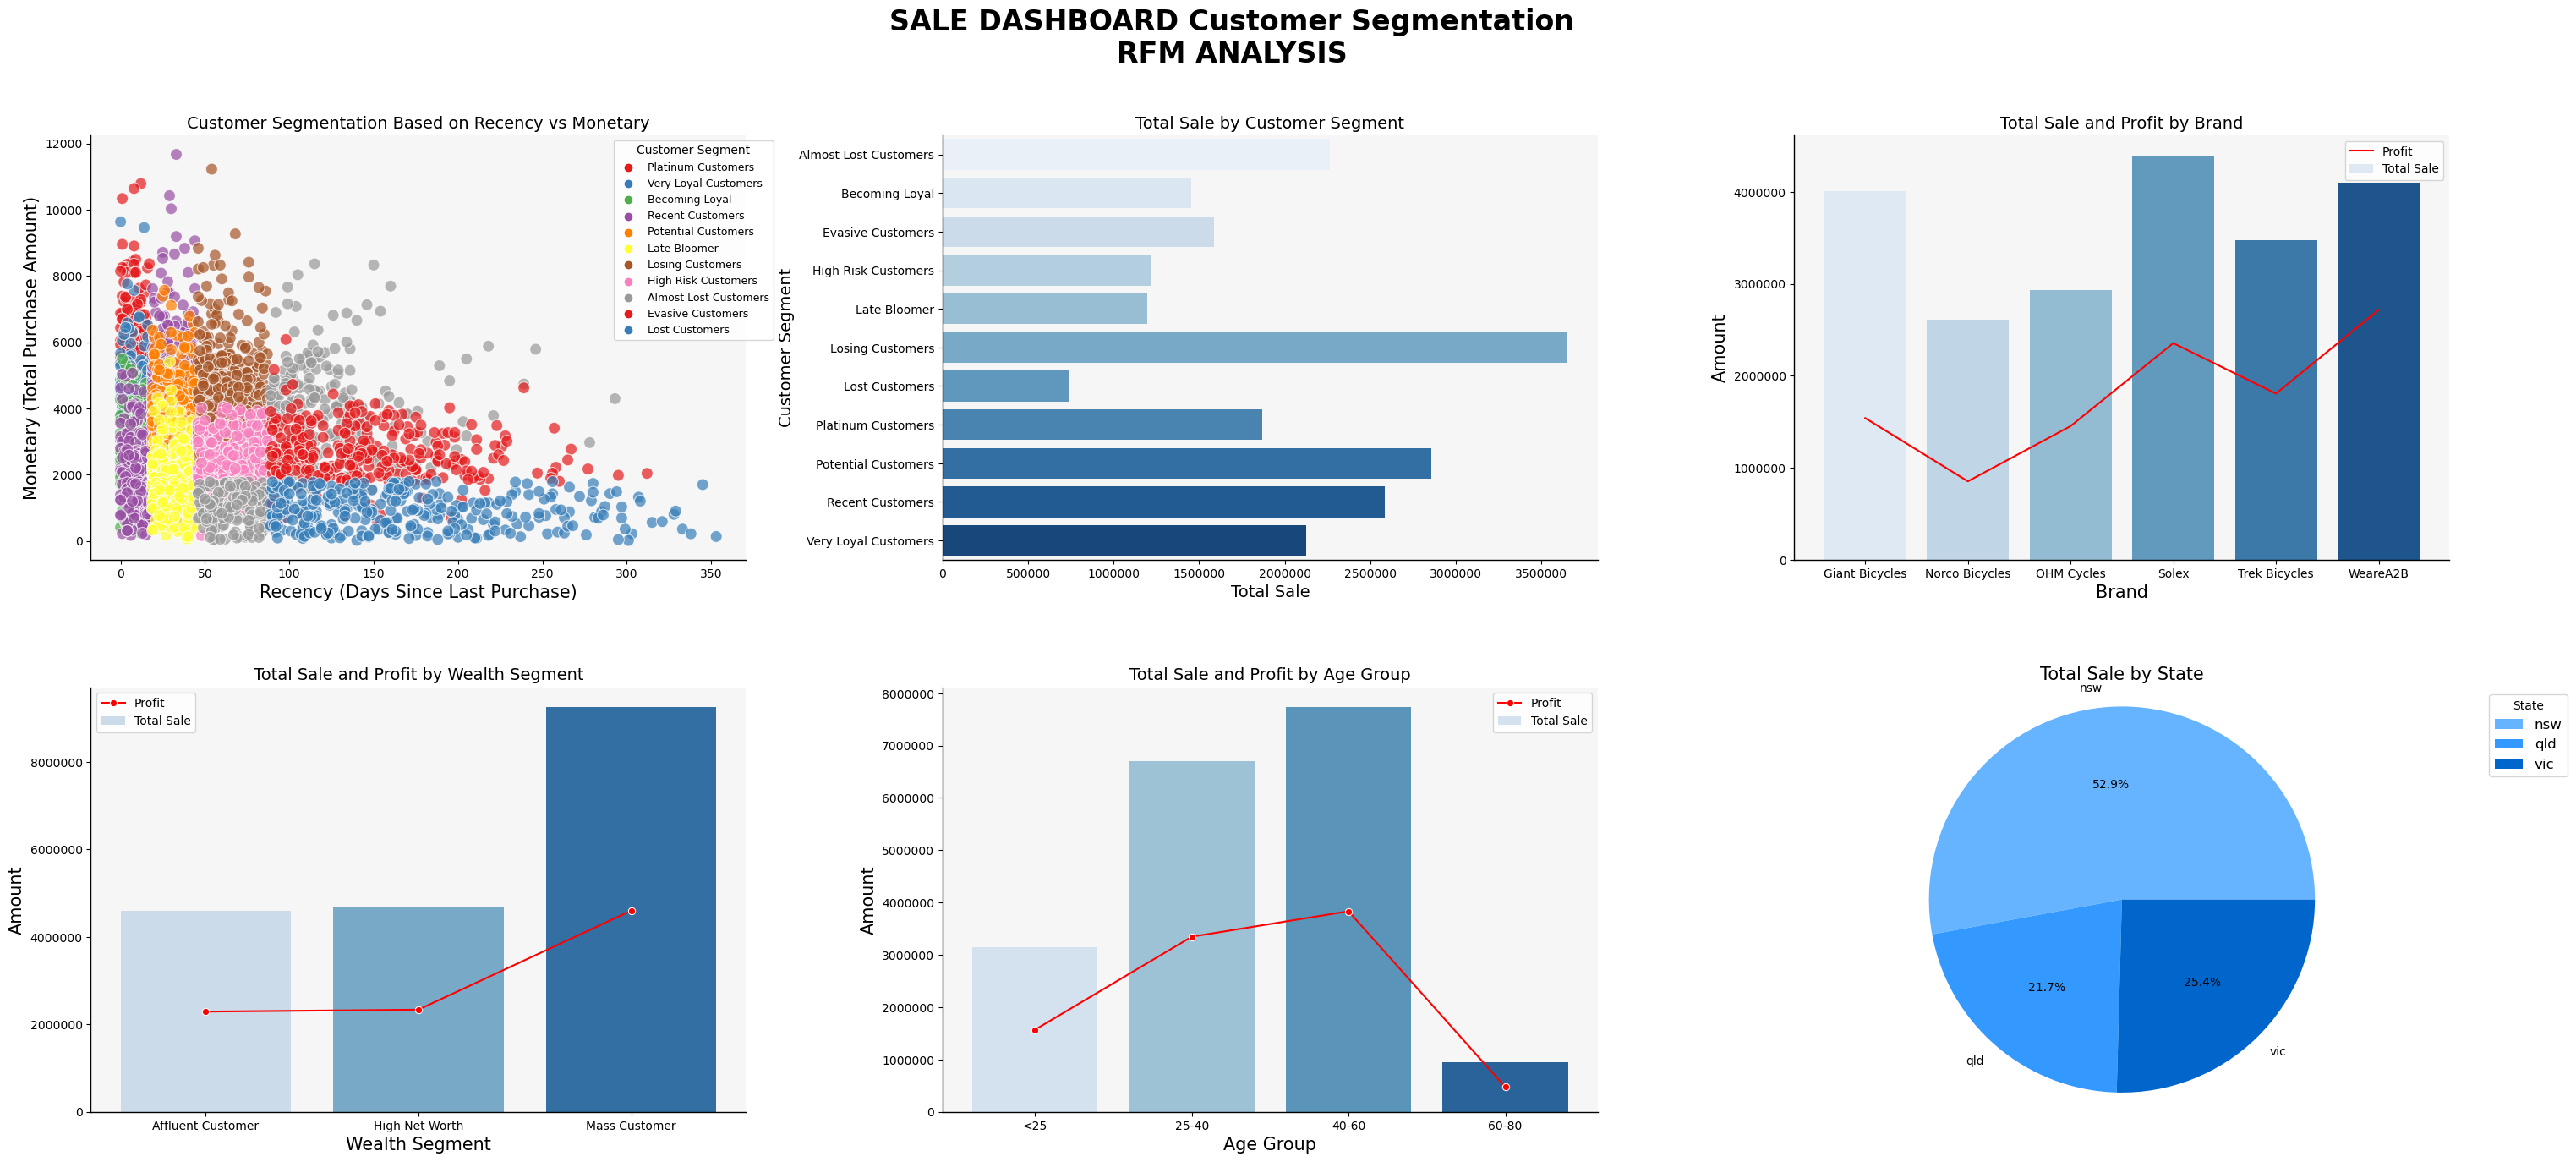

In [29]:


fig, axes = plt.subplots(2, 3, figsize=(36, 15))  # Hình chữ nhật ngang với tỷ lệ rộng
# Điều chỉnh khoảng cách giữa các subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

fig.suptitle("SALE DASHBOARD Customer Segmentation\nRFM ANALYSIS", fontsize=24, fontweight='bold', ha='center', va='top')

for ax in axes.flatten():
    # Thêm bóng nhẹ vào các subplot bằng cách tạo màu nền với độ mờ
    ax.patch.set_facecolor('lightgray')  # Đặt màu nền của subplot
    ax.patch.set_alpha(0.2)  # Thêm độ mờ (opacity) cho nền
    ax.spines['top'].set_linewidth(0)  # Loại bỏ đường viền trên
    ax.spines['right'].set_linewidth(0)  # Loại bỏ đường viền phải
    ax.spines['left'].set_linewidth(1)  # Đường viền trái vẫn giữ
    ax.spines['bottom'].set_linewidth(1)  # Đường viền dưới vẫn giữ




# Biểu đồ 1: Scatter plot - Customer Segmentation
sns.scatterplot(data=RFM, x='recency', y='monetary', hue='customer_segment', palette='Set1', s=100, alpha=0.7, ax=axes[0, 0])
axes[0, 0].set_title('Customer Segmentation Based on Recency vs Monetary', fontsize=14)
axes[0, 0].set_xlabel('Recency (Days Since Last Purchase)', fontsize=15)
axes[0, 0].set_ylabel('Monetary (Total Purchase Amount)', fontsize=15)
axes[0, 0].legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper right',  fontsize=9)

# Biểu đồ 2: Barplot theo chiều ngang - Total Sale by Customer Segment
sns.barplot(y='customer_segment', x='total_sale', data=RFM_transaction_summary, palette='Blues', orient='h', ax=axes[0, 1])
axes[0, 1].set_title('Total Sale by Customer Segment', fontsize=14)
axes[0, 1].ticklabel_format(style='plain', axis='x')
axes[0, 1].set_xlabel('Total Sale',fontsize=14)
axes[0, 1].set_ylabel('Customer Segment', fontsize=14)

# Biểu đồ 3: Barplot và Lineplot cho Total Sale và Profit - Wealth Segment
sns.barplot(x='wealth_segment', y='total_sale', data=summary_df, palette='Blues', ax=axes[1, 0], label='Total Sale')
sns.lineplot(x='wealth_segment', y='profit', data=summary_df, color='red', marker='o', ax=axes[1, 0], label='Profit')
axes[1, 0].set_title('Total Sale and Profit by Wealth Segment', fontsize=14)
axes[1, 0].set_xlabel('Wealth Segment', fontsize=15)
axes[1, 0].set_ylabel('Amount', fontsize=15)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].legend()

# Biểu đồ 4: Barplot và Lineplot cho Total Sale và Profit - Age Group
sns.barplot(x='age_group', y='total_sale', data=summary_df2, palette='Blues', ax=axes[1, 1], label='Total Sale')
sns.lineplot(x='age_group', y='profit', data=summary_df2, color='red', marker='o', ax=axes[1, 1], label='Profit')
axes[1, 1].set_title('Total Sale and Profit by Age Group', fontsize=14)
axes[1, 1].set_xlabel('Age Group', fontsize=15)
axes[1, 1].set_ylabel('Amount', fontsize=15)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].legend()

# Biểu đồ 5: Barplot và Lineplot cho Total Sale và Profit - Brand
sns.barplot(x='brand', y='list_price', data=total_sale_profit_by_brand, palette='Blues', ci=None, ax=axes[0, 2], label='Total Sale')
sns.lineplot(x='brand', y='Profit', data=total_sale_profit_by_brand, color='red', ci=None, ax=axes[0, 2], label='Profit')
axes[0, 2].set_title('Total Sale and Profit by Brand', fontsize=14)
axes[0, 2].set_xlabel('Brand', fontsize=15)
axes[0, 2].set_ylabel('Amount', fontsize=15)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].legend()

# Biểu đồ 6: Pie chart cho Total Sale by State
axes[1, 2].pie(Sale_by_state['list_price'], labels=Sale_by_state['state'], autopct='%1.1f%%', colors=['#66b3ff', '#3399ff', '#0066cc', '#003366', '#66ccff'])
axes[1, 2].set_title('Total Sale by State',fontsize=15)
axes[1, 2].axis('equal')  # Đảm bảo hình tròn
axes[1, 2].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)


# Hiển thị tất cả các biểu đồ
plt.show()


In [35]:
!pip install scikit-learn





In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [57]:
RFM_for_Kmeans = RFM[['recency', 'frequency', 'monetary']]

RFM_for_Kmeans  
scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(RFM_for_Kmeans)
RFM_scaled = pd.DataFrame(RFM_scaled, columns=RFM_for_Kmeans.columns)
RFM_scaled

,recency,frequency,monetary
0,-0.920814,2.370808,1.424728
1,-0.887020,1.497833,2.259907
2,-0.937711,1.934320,3.067692
3,-0.819432,3.680271,2.527804
4,-0.937711,1.061345,1.487374
...,...,...,...
3487,3.962393,-1.557581,-1.169038
3488,3.539971,-1.557581,-0.986927
3489,0.937846,-1.557581,-0.763887
3490,1.089919,-0.684606,-1.088678


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, 'Inertia')

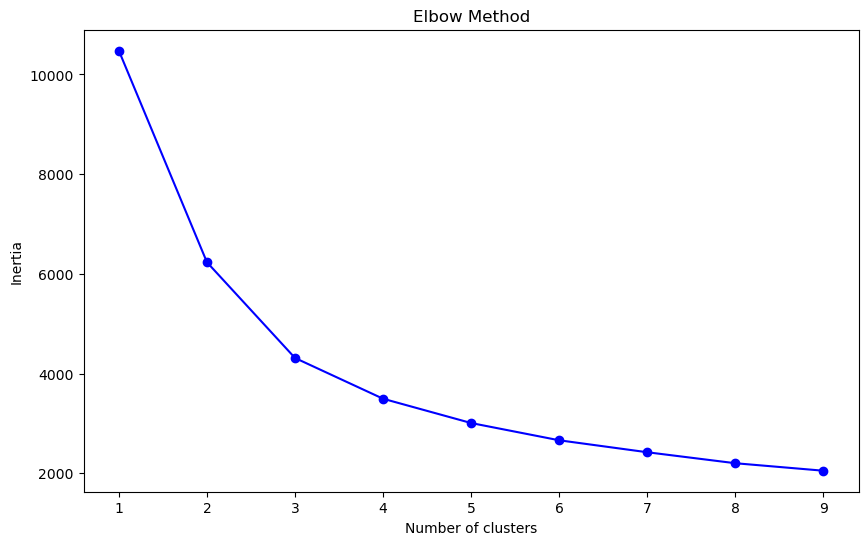

In [ ]:
inertia = []
for k in range (1,10):
    model= KMeans(n_clusters=k, random_state=42)
    model.fit(RFM_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10), inertia, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31860\2951490588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_for_Kmeans['cluster'] = model.labels_


Text(0.5, 1.0, 'Customer Segmentation Based on RFM & Kmeans')

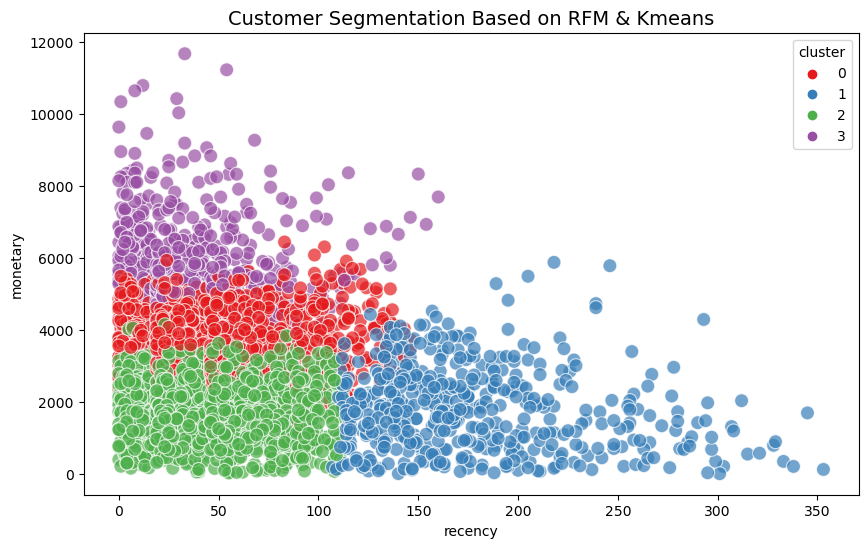

In [ ]:
model= KMeans(n_clusters=4, random_state=42)
model.fit(RFM_scaled)
inertia.append(model.inertia_)
RFM_for_Kmeans['cluster'] = model.labels_
RFM_for_Kmeans


plt.figure(figsize=(10,6))
sns.scatterplot(data=RFM_for_Kmeans, x='recency', y='monetary', hue='cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation Based on RFM & Kmeans', fontsize=14)